In [1]:
import os, pandas as pd, numpy as np
import ROOT
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set()

Welcome to JupyROOT 6.20/06


In [2]:
align220 = ROOT.TFile('/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1572087790.root')
align220.ls()

TFile**		/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1572087790.root	
 TFile*		/nfs/dust/fhlabs/group/BL4S/data/DESYChain/ConvertedData/1572087790.root	
  KEY: TTree	RAWdata;1	BL4S RAW data tree
  KEY: TTree	RECOdata;1	BL4S RECO data tree


In [3]:
reco_tree = align220.Get('RECOdata')
reco_tree.Print()

******************************************************************************
*Tree    :RECOdata  : BL4S RECO data tree                                    *
*Entries :   117364 : Total =        42230537 bytes  File  Size =   16889189 *
*        :          : Tree compression factor =   2.50                       *
******************************************************************************
*Br    0 :NChamber1_position :                                               *
*         | UInt_t Number of entries in branch Chamber1_position             *
*Entries :   117364 : Total  Size=     471473 bytes  File Size  =      45183 *
*Baskets :       15 : Basket Size=      32000 bytes  Compression=  10.42     *
*............................................................................*
*Br    1 :Chamber1_position :                                                *
*         | Double_t Local position of Chamber1 clusters in cm               *
*Entries :   117364 : Total  Size=     689526 bytes 

In [5]:
raw_tree = align220.Get('RAWdata')
raw_tree.Print()

******************************************************************************
*Tree    :RAWdata   : BL4S RAW data tree                                     *
*Entries :   117364 : Total =        95962222 bytes  File  Size =   19691878 *
*        :          : Tree compression factor =   4.88                       *
******************************************************************************
*Br    0 :QDC0_ch0  : QDC0_ch0/i                                             *
*Entries :   117364 : Total  Size=     471243 bytes  File Size  =     146516 *
*Baskets :       15 : Basket Size=      32000 bytes  Compression=   3.21     *
*............................................................................*
*Br    1 :QDC0_ch1  : QDC0_ch1/i                                             *
*Entries :   117364 : Total  Size=     471243 bytes  File Size  =     157460 *
*Baskets :       15 : Basket Size=      32000 bytes  Compression=   2.99     *
*...................................................

In [6]:
counter = 0
for event in raw_tree:
    if event.QDC0_ch1 != 0:
        counter += 1
print(counter)

117364


In [7]:
raw_tree.QDC0_ch1

109

mimosa0x: 0.1601207569508606
mimosa0y: -0.07063051201271404
mimosa1x: -0.06461846057860465
mimosa1y: -0.09961266679960284
mimosa2x: 0.05954989388342275
mimosa2y: -0.011716153431861982


dwc0x: 0.17213498114834727
dwc0y: 0.026641933809337017
dwc1x: -0.2918359275218577
dwc1y: 0.06619044044300657

micromega2x: -0.5097737670903252
micromega3y: -14.282806834735394

In [ ]:
counter = 0
track_list = []

micom1 = -5.550002018703863
micom2 = 9.993977765153637
micom3 = -12.417674134453438
mm0x = 0.1280648674350116
mm0y = -0.07592221686215
mm1x = -0.06662978502391795
mm1y = -0.10666666168351381
mm2x = 0.024718181540863783
mm2y = -0.028878914372700584
dwc0x = 0.15218727915480154
dwc0y = -4.044614026327264

for event in reco_tree:
    
    if (len(event.Chamber1_position) == 0 or len(event.Chamber2_position) == 0 or 
        len(event.Mimosa0_xPosition) == 0 or len(event.Mimosa1_xPosition) == 0 or len(event.Mimosa2_xPosition) == 0):
        counter += 1
        continue
    
        
    track = []
    track.append(list(zip([x-mm0x for x in event.Mimosa0_xPosition], [x-mm0y for x in event.Mimosa0_yPosition])))
    track.append(list(zip([x-mm1x for x in event.Mimosa1_xPosition], [x-mm1y for x in event.Mimosa1_yPosition])))
    track.append(list(zip([x-mm2x for x in event.Mimosa2_xPosition], [x-mm2y for x in event.Mimosa2_yPosition])))
    
    track.append(list(zip([x-dwc0x for x in event.DWC0_xPosition], [x-dwc0y for x in event.DWC0_yPosition])))
    
    track.append(list([x-micom1 for x in event.Chamber1_position]))
    track.append(list([x-micom2 for x in event.Chamber2_position]))
    track.append(counter)
    track_list.append(track)
    
    counter += 1
    

In [25]:
len(track_list)

8250

In [31]:
track_list[0][2]

[(0.07268000000000001, -0.06256),
 (-0.41952, 0.06256),
 (0.39192, 0.23368),
 (-0.7672800000000001, 0.26864),
 (0.73784, -0.34408),
 (-0.8556, -0.13616)]

[]

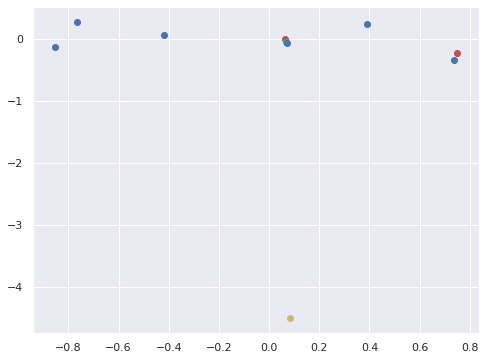

In [52]:
index = 5
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
for i in range(1):
    ax1.scatter(*zip(*track_list[i][0]), c='r')
    ax1.scatter(*zip(*track_list[i][1]), c='g')
    ax1.scatter(*zip(*track_list[i][2]), c='b')
    ax1.scatter(*zip(*track_list[i][3]), c='y')
    #ax1.scatter(*zip(*track_list[i][4]), c='black')
    #ax1.scatter(*zip(*track_list[i][5]), c='brown')


[(-0.6525, -16.3125)]


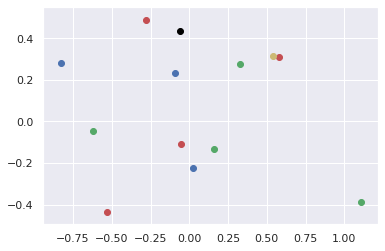

In [17]:
index = 3
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(*zip(*track_list[index][0]), c='r')
ax1.scatter(*zip(*track_list[index][1]), c='g')
ax1.scatter(*zip(*track_list[index][2]), c='b')
ax1.scatter(*zip(*track_list[index][3]), c='y')
ax1.scatter(*zip(*track_list[index][4]), c='black')
print(track_list[0][5])

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


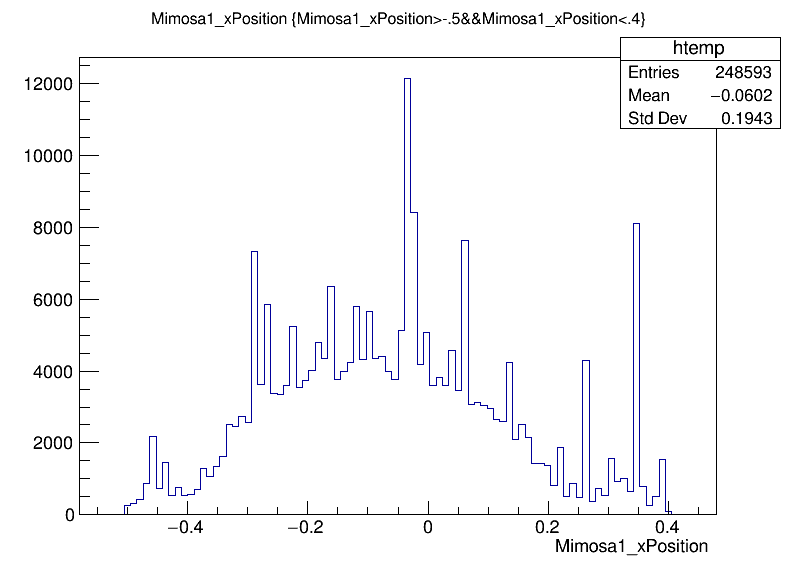

In [99]:
c = ROOT.TCanvas('c', 'c', 800, 600)
qdc1 = align145.Get('RECOdata')
qdc1.Draw('Mimosa1_yPosition', 'Mimosa1_xPosition>-.5&&Mimosa1_xPosition<.4')
c.Draw()
